In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


     |█████████████████████           | 321.6 MB 97.4 MB/s eta 0:00:023     |████████████████████▏           | 308.4 MB 97.4 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |█████████████████████████▎      | 387.2 MB 97.4 MB/s eta 0:00:02

     |█████████████████████████▋      | 391.4 MB 85.0 MB/s eta 0:00:02

     |██████████████████████████      | 397.1 MB 85.0 MB/s eta 0:00:02

     |██████████████████████████▍     | 403.4 MB 85.0 MB/s eta 0:00:02

     |██████████████████████████▊     | 409.0 MB 85.0 MB/s eta 0:00:01

     |███████████████████████████▏    | 415.8 MB 85.0 MB/s eta 0:00:01

     |███████████████████████████▋    | 422.0 MB 85.0 MB/s eta 0:00:01

     |████████████████████████████    | 428.6 MB 85.0 MB/s eta 0:00:01

     |████████████████████████████▌   | 435.4 MB 85.0 MB/s eta 0:00:01

     |████████████████████████████▉   | 441.9 MB 85.0 MB/s eta 0:00:01

     |█████████████████████████████▎  | 448.3 MB 85.0 MB/s eta 0:00:01

     |█████████████████████████████▊  | 454.4 MB 85.0 MB/s eta 0:00:01

     |██████████████████████████████▊ | 470.0 MB 85.0 MB/s eta 0:00:01

     |███████████████████████████████▏| 476.6 MB 85.0 MB/s eta 0:00:01

     |███████████████████████████████▋| 483.3 MB 85.0 MB/s eta 0:00:01

     |████████████████████████████████| 489.6 MB 85.0 MB/s eta 0:00:01

     |████████████████████████████████| 489.6 MB 82 kB/s 
     |████████████████████████████████| 2.1 MB 80.9 MB/s eta 0:00:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████████████████| 15.7 MB 24.5 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-12.0.0-py2.py3-none-manylinux1_x86_64.whl (13.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 4.1 MB 27.7 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
     |████████████████████████████████| 1.1 MB 82.8 MB/s eta 0:00:01
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
     |████████████████████████████████| 84 kB 10.0 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-an

In [3]:
pip install pandas

     |████████████████████████████████| 11.5 MB 8.7 MB/s eta 0:00:01    |███████▍                        | 2.7 MB 8.7 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 32.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import plot_roc_curve
import tensorflow as tf
from sklearn.metrics import confusion_matrix, average_precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
#Import the packages that will likely be required based on the guides followed
%matplotlib inline

2021-12-19 18:08:54.457609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 18:08:54.457632: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error

In [3]:
from google.colab import files#Only needed if you are working on Colab, choose the file you are using, otherwise, ignore this block of code if you are working in a directory where the file is already present
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
features = pd.read_csv('balanced.csv')#Read the file
features.head(5)#Print the first five lines

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,...,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,...,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,...,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,...,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,...,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847


In [4]:
print('The shape of our features is:', features.shape)#Dimension of the dataset

The shape of our features is: (292, 1879)


In [5]:
features.describe()#Equivalent to summary function on R

,cid,acvalue,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,2.920000e+02,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,9.311034e+07,0.984303,0.780822,-0.289388,0.641622,46.318243,58.987878,15.839041,18.017123,48.907534,...,0.833951,0.133095,0.580732,0.445563,0.322194,27.707453,98.381196,199.932229,0.750955,1.348489
std,2.845981e+07,3.903559,0.483304,0.748193,0.845010,27.640566,16.036612,4.878396,5.857094,15.879973,...,0.071198,0.060875,0.043798,0.041083,0.089886,12.887248,65.155626,154.818855,0.106715,0.094307
min,2.251000e+05,0.000500,0.000000,-2.559900,0.000108,13.956400,30.904758,0.000000,0.000000,22.000000,...,0.620699,0.032083,0.411450,0.299868,0.146048,12.724978,20.027951,38.794126,0.431048,1.102190
25%,8.665904e+07,0.015000,0.750000,-0.761225,0.071777,30.756950,48.472990,15.000000,17.000000,40.000000,...,0.806386,0.091067,0.564869,0.417350,0.257151,19.827983,60.734670,103.438766,0.709579,1.272678
50%,8.669881e+07,0.064583,1.000000,-0.376200,0.386143,37.682050,53.505877,15.000000,17.000000,43.000000,...,0.838338,0.135292,0.590261,0.448735,0.329968,22.838430,71.163447,129.822788,0.757507,1.359612
75%,1.058028e+08,0.307425,1.000000,0.084100,0.813251,49.352950,65.771834,18.000000,22.000000,53.000000,...,0.875081,0.164775,0.607159,0.472702,0.386631,30.544602,116.851217,246.626872,0.812622,1.414718
max,1.560206e+08,50.000000,2.000000,2.009600,6.553088,154.941800,108.768787,27.000000,31.000000,101.000000,...,0.948615,0.338928,0.661202,0.544706,0.526542,67.621720,490.823229,1074.728896,0.922922,1.560919


In [6]:
#checking for missing data
total_na_count = features.isna().sum()
print("TOTAL MISSING VALUE: ")
print(total_na_count)


TOTAL MISSING VALUE: 
cid         0
acvalue     0
smiles      0
Activity    0
nAcid       0
           ..
Ts          0
As          0
Vs          0
Ks          0
Ds          0
Length: 1879, dtype: int64


In [7]:
features_raw = pd.DataFrame.from_dict(features)
#the set of molecular descriptors contains empty strings, replacing them by NaN
features = features_raw.replace(r'^\s*$', np.nan, regex=True)

In [8]:
features = features.dropna()#removing NaN values
features

,cid,acvalue,smiles,Activity,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,225100,4.0000,O=C(O)CSc1nc2cc(Cl)c(Cl)cc2[nH]1,inactive,1,1.2172,1.481576,34.1060,30.904758,9,...,0.874729,0.099159,0.585817,0.360563,0.458213,13.362418,20.027951,38.794126,0.812094,1.404593
1,1825716,0.5500,Cc1ccc(OCCSc2ncccn2)c(Br)c1,inactive,0,1.9905,3.962090,32.9382,40.500309,12,...,0.872634,0.090528,0.578062,0.470886,0.395607,20.272577,47.048120,91.566431,0.808951,1.444554
2,11679800,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,1,0.5752,0.330855,29.2113,31.098344,9,...,0.859319,0.102457,0.562681,0.366310,0.342588,12.724978,20.209189,39.868393,0.788979,1.271579
3,14162967,0.0168,CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C...,active,0,0.8200,0.672400,134.7535,90.681236,0,...,0.669640,0.241653,0.539443,0.477526,0.454229,21.149437,108.540907,265.486570,0.504460,1.471197
4,14525327,3.0000,C[C@H](CC[C@@H](O)C(C)(C)O)[C@H]1CC[C@@]2(C)[C...,inactive,1,0.5720,0.327184,23.2561,66.975067,27,...,0.901413,0.057174,0.600107,0.432198,0.526542,38.983441,138.651258,304.079293,0.852119,1.558847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,156018930,1.7000,C[C@H](CCCNCCc1ccc([N+](=O)[O-])cc1)[C@H]1CC[C...,inactive,0,0.7363,0.542138,127.7864,98.686029,6,...,0.790709,0.140871,0.443263,0.444497,0.431592,26.935554,127.058657,302.930616,0.686063,1.319353
288,156018973,4.7000,COc1ccc(NCCC[C@@H](C)[C@H]2CC[C@@]3(C)[C@@H]4C...,inactive,0,-0.8248,0.680295,81.5718,89.901548,18,...,0.866148,0.118510,0.636378,0.356244,0.340686,57.786168,393.207263,754.864745,0.799223,1.333308
289,156019244,0.0120,COc1ccc(CN2CCC(C(=O)Nc3ccc(C(=O)N4CCN(Cc5ccc(C...,active,0,0.7997,0.639520,125.1828,96.557236,6,...,0.675105,0.252292,0.411450,0.500250,0.452533,26.563826,167.698162,426.053461,0.512658,1.364233
290,156019649,1.6000,C[C@H](CCCNCc1ccccn1)[C@H]1CC[C@@]2(C)[C@@H]3C...,inactive,0,0.7997,0.639520,125.1828,97.884029,6,...,0.666472,0.258607,0.454497,0.501094,0.475708,26.043090,163.905700,418.038649,0.499708,1.431298


# ALL PREDICTORS

In [9]:
X = features.drop(["smiles", "acvalue", "Activity", "cid"], axis = 1) #predictors
y = features['Activity'] #target
y.replace({'active':1, 'inactive':0,'Inactive':0}, inplace = True)
y = pd.DataFrame(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)

BAGGING

In [11]:
rf_features = BaggingClassifier(random_state = 42)#Python counts from zero(hence 1875), bagging is just a case where m=p
rf_features.fit(X_train,y_train)

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(random_state=42)

In [12]:
pred1 = rf_features.predict(X_test)
mean_squared_error(y_test, pred1)
pd.DataFrame(pred1)
pred1 = tf.math.round(pred1)
pred1

2021-12-19 18:09:26.253823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 18:09:26.253857: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 18:09:26.253872: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (set-d-di-07005.luna.kuleuven.be): /proc/driver/nvidia/version does not exist


<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0])>

2021-12-19 18:09:26.254156: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
rf_features.score(X_train, y_train)

0.9634703196347032

In [14]:
pred_test = accuracy_score(y_test,pred1)
print('accuracy_score on test dataset : ', pred_test)

accuracy_score on test dataset :  0.5068493150684932


In [15]:
print(classification_report(y_test, pred1, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred1):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred1))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           0      0.410     0.552     0.471        29
           1      0.618     0.477     0.538        44

    accuracy                          0.507        73
   macro avg      0.514     0.514     0.505        73
weighted avg      0.535     0.507     0.511        73

Average precision score: 0.610
Cohen kappa score:  0.02738712065136939
Confusion matrix: 
[[16 13]
 [23 21]]


In [16]:
parameters = {'max_features':range(1,1875)}

In [17]:
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1)
clf.fit(X_train, y_train)
Classifer = clf.best_estimator_
print (clf.best_score_, clf.best_params_) #Task takes minimum five hours, dont rerun unless you have time, take the parameter that I have chosen

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

KeyboardInterrupt: 

RANDOM FORESTS

In [18]:
rf_features_rf = RandomForestClassifier(max_features =637, random_state = 23)
rf_features_rf.fit(X_train,y_train)

/tmp/ipykernel_45532/2325808242.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_features_rf.fit(X_train,y_train)


RandomForestClassifier(max_features=637, random_state=23)

In [19]:
pred2 = rf_features_rf.predict(X_test)
mean_squared_error(y_test, pred2)
pd.DataFrame(pred2)
pred2 = tf.math.round(pred2)
pred2

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1])>

In [20]:
rf_features_rf.score(X_train, y_train)

0.9908675799086758

In [21]:
pred_test2 = accuracy_score(y_test,pred2)
print('accuracy_score on test dataset : ', pred_test2)

accuracy_score on test dataset :  0.6164383561643836


In [22]:
print(classification_report(y_test, pred2, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred2):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred2))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0      0.517     0.517     0.517        29
           1      0.682     0.682     0.682        44

    accuracy                          0.616        73
   macro avg      0.600     0.600     0.600        73
weighted avg      0.616     0.616     0.616        73

Average precision score: 0.657
Cohen kappa score:  0.19905956112852663
Confusion matrix: 
[[15 14]
 [14 30]]


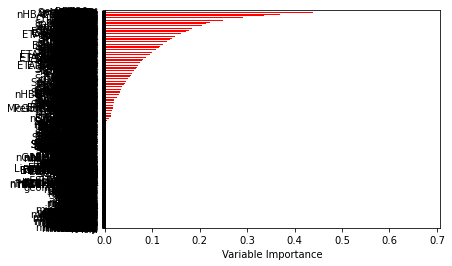

In [23]:
Importance = pd.DataFrame({'Importance':rf_features_rf.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
from matplotlib.pyplot import figure



plt.gca().legend_ = None

Bagging AUC

In [24]:
rfc_bag = BaggingClassifier(random_state=42)
rfc_bag.fit(X_train, y_train)


/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(random_state=42)

RF AUC

/tmp/ipykernel_45532/3241233403.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_rf.fit(X_train, y_train)


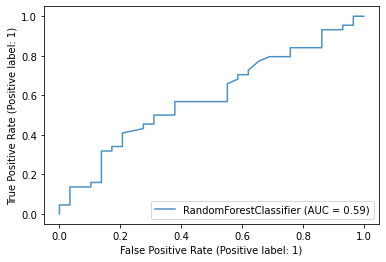

In [25]:
rfc_rf = RandomForestClassifier(max_features =637,random_state=42)
rfc_rf.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

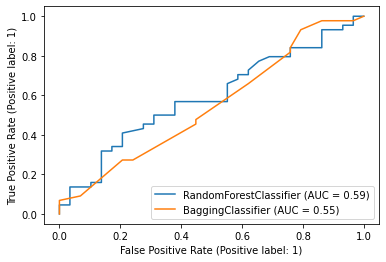

In [26]:
disp1= plot_roc_curve(rfc_rf,X_test, y_test)
plot_roc_curve(rfc_bag,X_test, y_test, ax=disp1.ax_);

# BEST SUBSET TAKEN FROM LASSO

In [27]:
features_sub = features[['Activity','AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p', 'E3s']]

In [28]:
X1 = features_sub.iloc[:, 1:] #X-axis covers feature sub
y1 = pd.DataFrame(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size = 0.75, random_state = 0)

Bagging

In [30]:
rf_features_1 = BaggingClassifier(max_features = 12, random_state = 23) #Python counts from zero(hence 4), bagging is just a case where m=p
rf_features_1.fit(X_train,y_train)

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(max_features=12, random_state=23)

In [31]:
print('Number of Trees used : ', rf_features_1.n_estimators)

Number of Trees used :  10


In [32]:
pred3 = rf_features_1.predict(X_test)
mean_squared_error(y_test, pred3)
pd.DataFrame(pred3)
pred3 = tf.math.round(pred3)
pred3

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0])>

In [33]:
rf_features_1.score(X_train, y_train)

0.954337899543379

In [34]:
predict_test3 = rf_features_1.predict(X_test)

In [35]:
# Accuracy Score of bagging on test dataset
accuracy_test3 = accuracy_score(y_test,predict_test3)
print('accuracy_score on test dataset : ', accuracy_test3)

accuracy_score on test dataset :  0.5342465753424658


In [36]:
print(classification_report(y_test, pred3, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred3):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred3))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           0      0.424     0.483     0.452        29
           1      0.625     0.568     0.595        44

    accuracy                          0.534        73
   macro avg      0.525     0.525     0.523        73
weighted avg      0.545     0.534     0.538        73

Average precision score: 0.615
Cohen kappa score:  0.04977029096477792
Confusion matrix: 
[[14 15]
 [19 25]]


# VISUALIZING A DECISION TREE

In [37]:
from sklearn.tree import plot_tree

In [38]:
from sklearn import tree

In [39]:
parameters2 = {'max_features':range(1,13),'max_depth':range(1,13)}

In [40]:
clf2 = GridSearchCV(tree.DecisionTreeClassifier(), parameters2, n_jobs=-1)
clf2.fit(X_train, y_train)
DT_Classifer = clf2.best_estimator_
print (clf2.best_score_, clf2.best_params_) 

0.6167019027484144 {'max_depth': 12, 'max_features': 11}


In [41]:
model = DecisionTreeClassifier()#Fully grown tree

In [42]:
model2 = DecisionTreeClassifier(max_depth=10,max_features=2)# Tuned tree

In [43]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=2)

In [45]:
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 14


In [46]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 0.96
|   |--- feature_11 <= 0.84
|   |   |--- feature_0 <= 160.89
|   |   |   |--- feature_11 <= 0.82
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_3 <= 1.14
|   |   |   |   |   |   |--- feature_9 <= 0.94
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_9 >  0.94
|   |   |   |   |   |   |   |--- feature_9 <= 0.96
|   |   |   |   |   |   |   |   |--- feature_10 <= 4.52
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_10 >  4.52
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  0.96
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  1.14
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.82
|   |   |   |   |--- feature_1 <= 1.00
|   |   |   |   |   |--- feature_3 <= 1.08
|   |   |   |   |   |   |--- f

In [47]:
text_representation2 = tree.export_text(model2)
print(text_representation2)

|--- feature_9 <= 0.83
|   |--- feature_1 <= -5.42
|   |   |--- class: 0
|   |--- feature_1 >  -5.42
|   |   |--- feature_9 <= 0.83
|   |   |   |--- feature_3 <= 0.82
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.82
|   |   |   |   |--- feature_1 <= 1.17
|   |   |   |   |   |--- feature_10 <= 2.96
|   |   |   |   |   |   |--- feature_0 <= 161.94
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  161.94
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10 >  2.96
|   |   |   |   |   |   |--- feature_2 <= 0.81
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.81
|   |   |   |   |   |   |   |--- feature_0 <= 163.54
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.86
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.91
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.91
|   |   |   |   |   |   |   |   |   |   |-

In [48]:

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=['AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p','E3s'], ##I think this should be X1 
                                class_names=['Active','Inactive'], ## I think this should be y1 or y but it gives a key value error
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [49]:
graph_data2 = tree.export_graphviz(model2, out_file=None, 
                                feature_names=['AATS5i', 'ATSC5p', 'GATS4m', 'GATS2i', 'nHBint6', 'nHeteroRing', 'n5HeteroRing', 'nF9HeteroRing', 'nT5HeteroRing', 'geomShape', 'RDF70m', 'P1p','E3s'], ##I think this should be X1 
                                class_names=['Active','Inactive'], ## I think this should be y1 or y but it gives a key value error
                                filled=True)

# Draw graph
graph2 = graphviz.Source(graph_data2, format="png") 
graph2

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [50]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

Target on train data [0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]


In [51]:
predict_train2 = model2.predict(X_train)
print('Target on train data with Model2',predict_train2) 

Target on train data with Model2 [0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1]


In [52]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.9908675799086758


In [53]:
# Accuray Score on train dataset 2
accuracy_train2 = accuracy_score(y_train,predict_train2)
print('accuracy_score on train dataset : ', accuracy_train2)

accuracy_score on train dataset :  0.9041095890410958


In [54]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test)

Target on test data [0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1]


In [55]:
# predict the target on the test dataset 2
predict_test2 = model2.predict(X_test)

In [56]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.4657534246575342


In [57]:
# Accuracy Score on test dataset
accuracy_test2 = accuracy_score(y_test,predict_test2)
print('accuracy_score on test dataset : ', accuracy_test2)

accuracy_score on test dataset :  0.547945205479452


In [58]:
parameters1 = {'max_features':range(1,14)}

RANDOM FOREST

In [59]:
clf1 = GridSearchCV(RandomForestClassifier(), parameters1, n_jobs=-1)
clf1.fit(X_train, y_train)
best_subset_model1 = clf1.best_estimator_
print (clf1.best_score_, clf1.best_params_) 

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: Dat

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.6390063424947146 {'max_features': 7}


In [70]:
rf_features_rf_1 = RandomForestClassifier(max_features =7, random_state = 23)
rf_features_rf_1.fit(X_train,y_train)

/tmp/ipykernel_45532/3559448929.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_features_rf_1.fit(X_train,y_train)


RandomForestClassifier(max_features=7, random_state=23)

In [71]:
print('Number of Trees used : ', rf_features_rf_1.n_estimators)

Number of Trees used :  100


In [72]:
pred4 = rf_features_rf_1.predict(X_test)
mean_squared_error(y_test, pred4)
pd.DataFrame(pred4)
pred4 = tf.math.round(pred4)
pred4

<tf.Tensor: shape=(73,), dtype=int64, numpy=
array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0])>

In [73]:
rf_features_rf_1.score(X_train, y_train)

0.9908675799086758

In [74]:
predict_test4 = rf_features_rf_1.predict(X_test)

In [75]:
# Accuracy Score on Random Forests on test dataset
accuracy_test4 = accuracy_score(y_test,predict_test4)
print('accuracy_score on test dataset : ', accuracy_test4)

accuracy_score on test dataset :  0.6027397260273972


In [76]:
print(classification_report(y_test, pred4, digits=3))
print(f"Average precision score: {average_precision_score(y_test, pred4):.3f}")
print("Cohen kappa score: ", cohen_kappa_score(y_test, pred4))
print("Confusion matrix: ")
print(confusion_matrix(y_test, pred4))

              precision    recall  f1-score   support

           0      0.500     0.517     0.508        29
           1      0.674     0.659     0.667        44

    accuracy                          0.603        73
   macro avg      0.587     0.588     0.588        73
weighted avg      0.605     0.603     0.604        73

Average precision score: 0.650
Cohen kappa score:  0.17530190884300745
Confusion matrix: 
[[15 14]
 [15 29]]


Bagging AUC

In [77]:
rfc_bag_1 = BaggingClassifier(random_state=42)
rfc_bag_1.fit(X_train, y_train)

/home/r0772183/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(random_state=42)

Random Forests AUC

In [79]:
rfc_rf_1 = RandomForestClassifier(max_features=7,random_state=42)
rfc_rf_1.fit(X_train, y_train)



/tmp/ipykernel_45532/1697288486.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_rf_1.fit(X_train, y_train)


RandomForestClassifier(max_features=7, random_state=42)

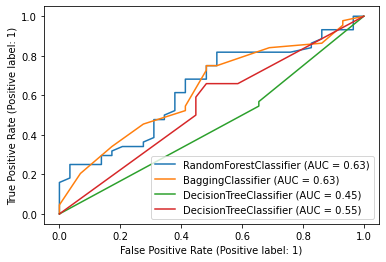

In [80]:
disp= plot_roc_curve(rfc_rf_1,X_test, y_test)
plot_roc_curve(rfc_bag_1,X_test, y_test, ax=disp.ax_);
plot_roc_curve(model,X_test, y_test, ax=disp.ax_);
plot_roc_curve(model2,X_test, y_test, ax=disp.ax_)